In [1]:
from NLSolver import *

LM took: 0.01396322250366211


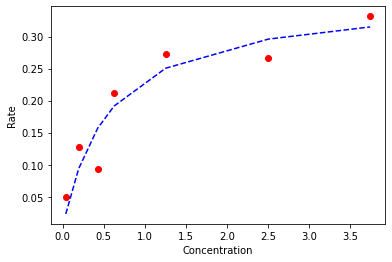

In [2]:
# Wikipedia Gauss-Newton Example, using very efficient scipy implementation

from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt
from time import time

# Data
S = np.array([0.038,0.194,0.425,0.626,1.253,2.5,3.74])
r = np.array([0.05,0.127,0.094,0.2122,0.2729,0.2665,0.3317])

# Rate equation
def rate_eq(S,Vmax,Km):
    return Vmax*S / (Km + S)

# Fit with LM in scipy

# Play with these, you will see how robust this is (its scipy, its very robust)
p0 = np.array([100,100])
t0 = time()
popt, res = curve_fit(rate_eq, S, r, p0=p0)
t1 = time()
print('LM took: %s'%(t1-t0))
err = np.sqrt(np.diag(res))
ypred = rate_eq(S,popt[0],popt[1])

# Plot result
plt.plot(S,r,'ro')
plt.plot(S,ypred,'b--')
plt.xlabel('Concentration')
plt.ylabel('Rate');

Levenberg–Marquardt; Iteration: 0, RMSE: 0.04463193468573001
Levenberg–Marquardt; Iteration: 1, RMSE: 0.040058373942973215
Levenberg–Marquardt; Iteration: 2, RMSE: 0.03356044664155601
Levenberg–Marquardt; Iteration: 3, RMSE: 0.033475516258554855
Levenberg–Marquardt; Iteration: 4, RMSE: 0.03347496832375215
Levenberg–Marquardt; Iteration: 5, RMSE: 0.033474949605913976
Levenberg–Marquardt; Iteration: 6, RMSE: 0.03347494961843725
GN in Python took: 0.0029735565185546875


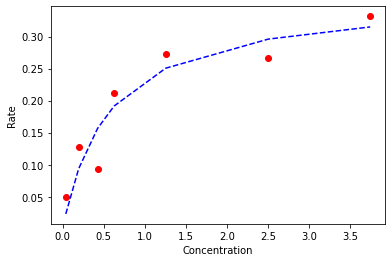

In [4]:
# Rate equation in vector form as required by above
def rate_eq(S,args):
    return args[0]*S / (args[1] + S)

# Initial parameters, try this a few times, you will see why GN has issues
B0 = np.array([0.1,0.1])

# Call solver above, actually its impressively fast even in pure Python for this case
t0 = time()
gns = NLSolver(B0, S, r, rate_eq,method='Levenberg–Marquardt')
gns.fit()
t1 = time()
ypred = gns.predict()

# Plot result
plt.plot(S,r,'ro')
plt.plot(S,ypred,'b--')
plt.xlabel('Concentration')
plt.ylabel('Rate')

print('GN in Python took: %s'%(t1-t0))

Levenberg–Marquardt; Iteration: 0, RMSE: 0.30633577589271177
Levenberg–Marquardt; Iteration: 1, RMSE: 0.0841786561560802
Levenberg–Marquardt; Iteration: 2, RMSE: 6.975024557061942
Levenberg–Marquardt; Iteration: 3, RMSE: 0.4934241912030977
Levenberg–Marquardt; Iteration: 4, RMSE: 0.34478678791374445
Levenberg–Marquardt; Iteration: 5, RMSE: 0.41292352888849987
Levenberg–Marquardt; Iteration: 6, RMSE: 0.2654120762137941
Levenberg–Marquardt; Iteration: 7, RMSE: 0.238986829303892
Levenberg–Marquardt; Iteration: 8, RMSE: 0.22103671587369073
Levenberg–Marquardt; Iteration: 9, RMSE: 0.21697995105803083
Levenberg–Marquardt; Iteration: 10, RMSE: 0.2164831329380287
Levenberg–Marquardt; Iteration: 11, RMSE: 0.21647022339560595
Levenberg–Marquardt; Iteration: 12, RMSE: 0.21647018600666412
Levenberg–Marquardt; Iteration: 13, RMSE: 0.21645724022263613
Levenberg–Marquardt; Iteration: 14, RMSE: nan
Levenberg–Marquardt; Iteration: 15, RMSE: nan
Levenberg–Marquardt; Iteration: 16, RMSE: nan
Levenberg–Ma

C:\Users\jerem\OneDrive\Desktop\projects\non_linear_regression_websit\NLSolver.py:81: RuntimeWarning: invalid value encountered in true_divide
  J[:,i] = delta_residual / (b[i] - b0[i])


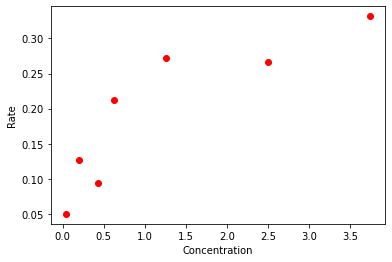

In [6]:
# Rate equation in vector form as required by above
def rate_eq(S,args):
    return args[0]*S / (args[1] + S)

# Initial parameters, try this a few times, you will see why GN has issues
B0 = np.array([10,10])

# Call solver above, actually its impressively fast even in pure Python for this case
t0 = time()
gns = NLSolver(B0, S, r, rate_eq,method='Levenberg–Marquardt')
gns.fit()
t1 = time()
ypred = gns.predict()

# Plot result
plt.plot(S,r,'ro')
plt.plot(S,ypred,'b--')
plt.xlabel('Concentration')
plt.ylabel('Rate')

print('GN in Python took: %s'%(t1-t0))

Levenberg–Marquardt; Iteration: 0, RMSE: 0.08236947891919687
Levenberg–Marquardt; Iteration: 1, RMSE: 0.7646656476301681
Levenberg–Marquardt; Iteration: 2, RMSE: 0.045954218877901215
Levenberg–Marquardt; Iteration: 3, RMSE: 0.0405233893837467
Levenberg–Marquardt; Iteration: 4, RMSE: 0.03381383170770297
Levenberg–Marquardt; Iteration: 5, RMSE: 0.033492319767416144
Levenberg–Marquardt; Iteration: 6, RMSE: 0.033474961378133036
Levenberg–Marquardt; Iteration: 7, RMSE: 0.033474964847900385
Levenberg–Marquardt; Iteration: 8, RMSE: 0.03347494959420466
Levenberg–Marquardt; Iteration: 9, RMSE: 0.0334749496130716
GN in Python took: 0.0040242671966552734


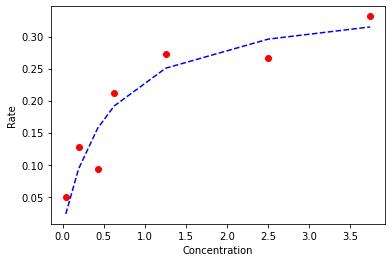

In [5]:
# Rate equation in vector form as required by above
def rate_eq(S,args):
    return args[0]*S / (args[1] + S)

# Initial parameters, try this a few times, you will see why GN has issues
B0 = np.array([0.01,0.01])

# Call solver above, actually its impressively fast even in pure Python for this case
t0 = time()
gns = NLSolver(B0, S, r, rate_eq,method='Levenberg–Marquardt')
gns.fit()
t1 = time()
ypred = gns.predict()

# Plot result
plt.plot(S,r,'ro')
plt.plot(S,ypred,'b--')
plt.xlabel('Concentration')
plt.ylabel('Rate')

print('GN in Python took: %s'%(t1-t0))

In [6]:
gns.b

array([nan, nan])

In [11]:
r = gns.compute_residual(r, rate_eq, S, B0)
r

array([ 0.01339114, -0.03547906, -0.20424561, -0.17279385, -0.28324736,
       -0.44778571, -0.45732954])

In [12]:
B1 = B0 + 1e-6
J = gns.compute_jacobian(S, B1, B0, rate_eq, r)
J

array([[ 0.03660886, -0.03526862],
       [ 0.16247906, -0.1360795 ],
       [ 0.29824561, -0.20929502],
       [ 0.38499385, -0.23677344],
       [ 0.55614736, -0.24684736],
       [ 0.71428571, -0.20408157],
       [ 0.78902954, -0.16646189]])

In [13]:
JpI = gns.compute_pseudoinverse(J)
JpI

array([[-0.15228528, -0.51856525, -0.64040698, -0.56977833, -0.09089132,
         0.7521377 ,  1.28448736],
       [-0.50146768, -1.77155745, -2.35282362, -2.29564603, -1.20277873,
         0.96317329,  2.37338311]])

In [14]:
JpI @ r

array([-0.65287236, -0.24266414])

In [15]:
B2 = B1 - JpI @ r
B2

array([1.65287336, 1.24266514])

In [9]:
np.isnan(gns.b).sum()

2